# Mini-Project I
During this project, we will practice handling of complex lists and dictionaries in Python. Plus, we will learn how to work with API documentation. Don't be afraid to search for the information in the [**documentation**](https://api.tfl.gov.uk/swagger/ui/index.html?url=/swagger/docs/v1#!/AccidentStats/AccidentStats_Get).

Let's go to the tasks, we have some parsing to do :)!!

In [2]:
import requests
import os
from IPython.display import JSON
import json
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]

In [ ]:
# import packages we need (remember what packages we used yesterday during the API session)
# IMPORT HERE

## Demo

In [4]:
# don't forget package os

#app_id = os.environ["<your app id name>"]
#app_key = os.environ["<your app key name>"]
url_append = '' #f'?app_id={app_id}&app_key={app_key}' 

In [5]:
print(url_append)

In [6]:
# URL
url = "https://api.tfl.gov.uk/AirQuality"

In [7]:
# We send the request to the API
# NOTE: if you don't have your APP_KEY, run this without the url_append
res = requests.get(url+url_append)

In [8]:
# We can check if the request was successful
res.status_code

200

In [13]:
# We can export the information that was returned using method .json()
results = res.json()
JSON(results)

<IPython.core.display.JSON object>

## Task
Parse the dictionary and print the AirQuality predictions for tomorrow

In [18]:
print(results['currentForecast'][1]['forecastSummary'])

Low air pollution forecast valid from Friday 29 October to end of Friday 29 October GMT


## Task
What are the different modes of transport which are operated by Transfer for London? How many of modes do they have?

Print the list with different modes of transport, plus their count. Example output:
```
[bus, cable-car,.....]
Number of different modes of transport is: xyz
```

We need to search the documentation for correct request.

In [24]:
res = requests.get('https://api.tfl.gov.uk/Line/Meta/Modes')
print(res.status_code)
results = res.json()
JSON(results)


200


<IPython.core.display.JSON object>

In [25]:
mode_list = [mode['modeName'] for mode in results]
print(mode_list)
print(f'Number of different modes of travel is: {len(results)}')

['bus', 'cable-car', 'coach', 'cycle', 'cycle-hire', 'dlr', 'interchange-keep-sitting', 'interchange-secure', 'national-rail', 'overground', 'replacement-bus', 'river-bus', 'river-tour', 'taxi', 'tflrail', 'tram', 'tube', 'walking']
Number of different modes of travel is: 18


## Task
How many BikePoints in London are operated by Transfor for London? How many docks are in **all** BikePoints? There is the information for empty and full docks for each BikePoint.

In [31]:
res = requests.get('https://api.tfl.gov.uk/BikePoint')
print(res.status_code)
results = res.json()
JSON(results)

200


<IPython.core.display.JSON object>

In [30]:
print(len(results))

782


In [32]:
dock_count = 0
for bike_point in results:
    dock_count += int(bike_point['additionalProperties'][8]['value'])

print(dock_count)

20672


## Task
How many tube and bus lines are in London? Print names of all tube lines.

In [87]:
res = requests.get('https://api.tfl.gov.uk/Line/Mode/tube,bus/Route')
print(res.status_code)
results = res.json()
JSON(results)

200


<IPython.core.display.JSON object>

In [40]:
print(f'Total number of Tube and bus lines is: {len(results)}')

for line in results:
    if line['modeName'] == 'tube':
        print(line['name'])


Total number of Tube and bus lines is: 687
Bakerloo
Central
Circle
District
Hammersmith & City
Jubilee
Metropolitan
Northern
Piccadilly
Victoria
Waterloo & City


## Task
How many station has `victoria` line?

In [41]:
res = requests.get('https://api.tfl.gov.uk/Line/victoria/StopPoints')
print(res.status_code)
results = res.json()
JSON(results)

200


<IPython.core.display.JSON object>

In [42]:
print(f'Victoria line has {len(results)} stations.')

Victoria line has 16 stations.


## Task
Plan the journey from Heathrow Airport to Tower Bridge using Bus and Tube? Which way is faster? Example output:
```
Planned duration:
Bus: x minutes
Tube: y minutes
```

We need to search the documentation for correct requests and parameters we need.

Use search to get id for Heathrow Airport:

In [55]:
search_1_params = {'query': 'Heathrow Airport',
                  'maxResults': 10}
response_1 = requests.get('https://api.tfl.gov.uk/StopPoint/Search', params=search_1_params)
print(response_1.url)
print(response_1.status_code)
results_1 = response_1.json()                        
JSON(results_1)    

https://api.tfl.gov.uk/StopPoint/Search?query=Heathrow+Airport&maxResults=10
200


<IPython.core.display.JSON object>

Use search to get id for Tower Bridge:

In [52]:
search_2_params = {'query': 'Tower Bridge',
                  'maxResults': 1}
response_2 = requests.get('https://api.tfl.gov.uk/StopPoint/Search', params=search_2_params)
print(response_2.url)
print(response_2.status_code)
results_2 = response_2.json()                        
JSON(results_2) 

https://api.tfl.gov.uk/StopPoint/Search?query=Tower+Bridge&maxResults=1
200


<IPython.core.display.JSON object>

Get journeys using tube:

In [74]:
url_params = {'mode': 'tube',
             'journeyPreference': 'leasttime'}
tube_res = requests.get(f'https://api.tfl.gov.uk/Journey/JourneyResults/{results_1["matches"][1]["icsId"]}/to/{results_2["matches"][0]["icsId"]}', params=url_params)
print(tube_res.url)
print(tube_res.status_code)
tube_results = tube_res.json()                        
JSON(tube_results)

https://api.tfl.gov.uk/Journey/JourneyResults/1016430/to/1013744?mode=tube&journeyPreference=leasttime
200


<IPython.core.display.JSON object>

Get journerys using bus:

In [75]:
url_params = {'mode': 'bus',
             'journeyPreference': 'leasttime'}
bus_res = requests.get(f'https://api.tfl.gov.uk/Journey/JourneyResults/{results_1["matches"][1]["icsId"]}/to/{results_2["matches"][0]["icsId"]}', params=url_params)
print(bus_res.url)
print(bus_res.status_code)
bus_results = bus_res.json()                        
JSON(bus_results)

https://api.tfl.gov.uk/Journey/JourneyResults/1016430/to/1013744?mode=bus&journeyPreference=leasttime
200


<IPython.core.display.JSON object>

Display results:

In [76]:
bus_times = [bus_results['journeys'][x]['duration'] for x in range(len(bus_results['journeys']))]
tube_times = [tube_results['journeys'][x]['duration'] for x in range(len(tube_results['journeys']))]
print(bus_times)
print(tube_times)

[105, 106, 112]
[316, 82, 85]


In [78]:
print('Planned Duration:')
print(f'Bus: {min(bus_times)}')
print(f'Tube: {min(tube_times)}')

Planned Duration:
Bus: 105
Tube: 82


# AccidentStats

loop through get request for accident data for different years. save results in a file

In [26]:
for x in range(1):
    year = 2009
    res = requests.get(f'https://api.tfl.gov.uk/AccidentStats/{str(year)}')
    results = res.json()
    print(res.status_code)
    with open(f'accidents{year}.json', 'w') as outfile:
        json.dump(results, outfile, indent=4)
    


200


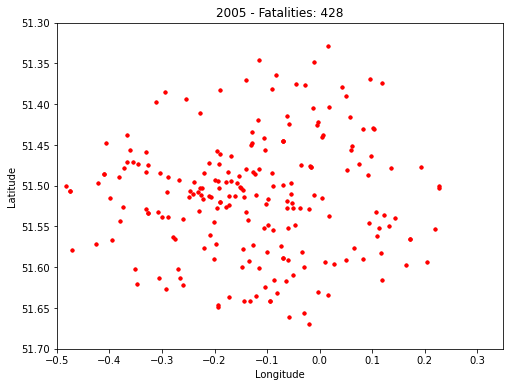

In [3]:
#one year per plot
def plot_fatal_casualties(results, year):  
    lat = []
    lon = []
    colors = ['red', 'orange', 'yellow', 'green', 'aqua', 'navy', 'darkviolet', 'deeppink']
    fatal_count = 0
    for accident in range(len(results)):
        #print(results[accident]['casualties'])
        for casualty in results[accident]['casualties']:
            if casualty['severity'] == 'Fatal':
                lat.append(results[accident]['lat'])
                lon.append(results[accident]['lon'])
                fatal_count += 1
    
    plt.plot(lon,lat, marker = '.', color = colors[0], linestyle = '')
    plt.xlabel('Longitude')
    plt.xlim(-0.5,0.35)
    plt.ylabel('Latitude')
    plt.ylim(51.7,51.3)
    plt.title(f'{str(year)} - Fatalities: {fatal_count}')
    plt.savefig(f'fatalities{year}.png', transparent=True)
    plt.show()

# Enter year 2005 - 2019
year = 2005
    
with open(f'accidents{year}.json') as f:
    results = json.load(f)
    
plot_fatal_casualties(results, year)

    

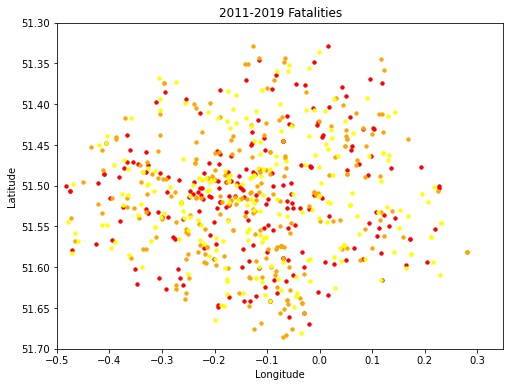

In [6]:
# multiple years per plot


def plot_fatal_casualties(results, year):  
    lat = []
    lon = []
    colors = ['red', 'orange', 'yellow', 'green', 'aqua', 'navy', 'darkviolet', 'deeppink']
    fatal_count = 0
    for accident in range(len(results)):
        #print(results[accident]['casualties'])
        for casualty in results[accident]['casualties']:
            if casualty['severity'] == 'Fatal':
                lat.append(results[accident]['lat'])
                lon.append(results[accident]['lon'])
                fatal_count += 1
    
    plt.plot(lon,lat, marker = '.', color = colors[year-2005], linestyle = '')
    plt.xlabel('Longitude')
    plt.xlim(-0.5,0.35)
    plt.ylabel('Latitude')
    plt.ylim(51.7,51.3)
    plt.title('2011-2019 Fatalities')
    
#Set the number of years starting from 2005
number_of_years = 3
for x in range(number_of_years):
    year = 2005 + x
    
    with open(f'accidents{year}.json') as f:
        results = json.load(f)
    
    plot_fatal_casualties(results, year)
    
plt.savefig('fatalities.png', transparent=True)
plt.show()
    

Parse lat and long of fatal accident casualties

In [2]:
# one year per plot


In [5]:
#
    